# Análise Exploratória de Dados: Fatores de Sucesso no YouTube
**Grupo:** [Coloque os nomes aqui]
**Disciplina:** Análise de Dados
**Data:** [Data de hoje]

---

## 1. Introdução e Definição do Problema
### 1.1 O Problema
No ecossistema de criação de conteúdo digital, especialmente no YouTube, entender o que alavanca o sucesso de um vídeo é crucial. A pergunta central deste trabalho é: **"Quais métricas técnicas (taxa de clique, duração, impressões) mais influenciam o número final de visualizações de um vídeo técnico?"**

### 1.2 Motivação
A escolha do tema baseia-se na atuação prática de um dos membros do grupo no nicho de desenvolvimento de jogos (*GameDev*). Em vez de depender apenas da intuição criativa, buscamos nos dados estatísticos padrões que expliquem por que alguns vídeos viralizam enquanto outros estagnam.

## 2. Descrição da Base de Dados
A base de dados foi construída a partir de dados reais extraídos do **YouTube Studio** do canal *Zee GameDev*.
* **Origem:** Exportação bruta (CSV) do painel analítico do YouTube.
* **Volume:** Aproximadamente 500 entradas (vídeos).
* **Período:** Últimos 365 dias.
* **Principais Variáveis:** Título, Data de Publicação, Visualizações, Impressões (quantas vezes a capa apareceu), Taxa de Clique (CTR) e Duração Média.

## 3. Ferramentas Utilizadas
Para garantir reprodutibilidade e eficiência na análise, utilizamos:
* **Linguagem Python:** Pela robustez em ciência de dados.
* **Pandas:** Para manipulação, limpeza e organização tabular dos dados.
* **Matplotlib & Seaborn:** Para visualização gráfica de dados e correlações.
* **VS Code (Jupyter Notebook):** Ambiente de desenvolvimento integrado.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo dos gráficos
plt.style.use('ggplot')
sns.set_palette("husl")

# Carregamento da Base de Dados
# Nota: O arquivo original foi renomeado para remover espaços e evitar erros de leitura
try:
    df = pd.read_csv('Estatisticas_canal_Dados_da_tabela.csv') # Verifique se o nome do arquivo na pasta é este
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo não encontrado. Verifique o nome do CSV.")

# Visualizando as primeiras linhas (Raw Data)
display(df.head(3))

Dataset carregado com sucesso!


,Conteúdo,Título do vídeo,Horário de publicação do vídeo,Duração,Duração média da visualização,Visualizações,Tempo de exibição (horas),Inscritos,Impressões,Taxa de cliques de impressões (%)
0,Total,NaN,NaN,NaN,0:02:12,2126480,"71713,9755",19173,20770784,"6,14"
1,_AdS19QwGLo,COMO CRIAR UM JOGO NO ROBLOX NO CELULAR!!! - S...,"Jan 6, 2025",984.0,0:03:40,194752,"11907,8258",3568,1754209,"7,68"
2,ULgJ3c2GHHM,COMO USAR A GODOT ENGINE NO CELULAR - 2024,"Apr 8, 2024",2068.0,0:04:55,41360,"3389,9757",414,233099,"11,98"


## 4. Tratamento e Limpeza dos Dados
Os dados brutos do YouTube apresentam formatação brasileira (uso de vírgula para decimais) e colunas de tempo em formato texto (HH:MM:SS), o que impede cálculos matemáticos diretos.

**Procedimentos realizados:**
1.  Remoção da linha de "Total" (agregado) que distorce a estatística individual.
2.  Conversão de colunas numéricas (substituição de vírgula por ponto).
3.  Transformação da "Duração" para segundos (inteiro).
4.  Conversão da data de publicação para formato *datetime*.

In [6]:
# 1. Remover linha de totais (geralmente a primeira)
df = df[df['Conteúdo'] != 'Total'].copy()

# 2. Converter colunas numéricas (Texto "10,5" -> Float 10.5)
cols_to_fix = ['Taxa de cliques de impressões (%)', 'Tempo de exibição (horas)']
for col in cols_to_fix:
    # Força conversão para string, troca vírgula e converte para numero
    df[col] = df[col].astype(str).str.replace(',', '.').apply(pd.to_numeric, errors='coerce')

# 3. Garantir que Duração e Visualizações são números
df['Duração (seg)'] = pd.to_numeric(df['Duração'], errors='coerce')
df['Visualizações'] = pd.to_numeric(df['Visualizações'], errors='coerce')

# 4. Tratamento de Data
df['Data Publicação'] = pd.to_datetime(df['Horário de publicação do vídeo'], errors='coerce')

# Verificando os tipos de dados após limpeza
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 1 to 499
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Conteúdo                           499 non-null    object        
 1   Título do vídeo                    499 non-null    object        
 2   Horário de publicação do vídeo     498 non-null    object        
 3   Duração                            499 non-null    float64       
 4   Duração média da visualização      499 non-null    object        
 5   Visualizações                      499 non-null    int64         
 6   Tempo de exibição (horas)          499 non-null    float64       
 7   Inscritos                          499 non-null    int64         
 8   Impressões                         499 non-null    int64         
 9   Taxa de cliques de impressões (%)  499 non-null    float64       
 10  Duração (seg)                      499 non-

## 5. Análise Exploratória de Dados (EDA)

### 5.1 Estatística Descritiva
Antes de plotar gráficos, analisamos as métricas fundamentais para entender a "regua" do canal.

In [7]:
# Resumo estatístico das principais métricas
display(df[['Visualizações', 'Impressões', 'Taxa de cliques de impressões (%)', 'Duração (seg)']].describe())

,Visualizações,Impressões,Taxa de cliques de impressões (%),Duração (seg)
count,499.000000,4.990000e+02,499.000000,499.000000
mean,4221.883768,4.076789e+04,5.062204,1016.939880
std,12945.392104,1.067039e+05,3.079921,1644.192433
min,21.000000,3.450000e+02,0.500000,8.000000
25%,409.000000,5.757000e+03,2.855000,442.500000
50%,978.000000,1.463200e+04,4.180000,596.000000
75%,2894.500000,3.997800e+04,6.735000,833.500000
max,194752.000000,1.754209e+06,20.580000,14509.000000


### 5.2 Mapa de Correlação
Investigamos como as variáveis interagem entre si.
* **Hipótese:** Vídeos com maior taxa de clique (CTR) ou maior duração têm mais visualizações?

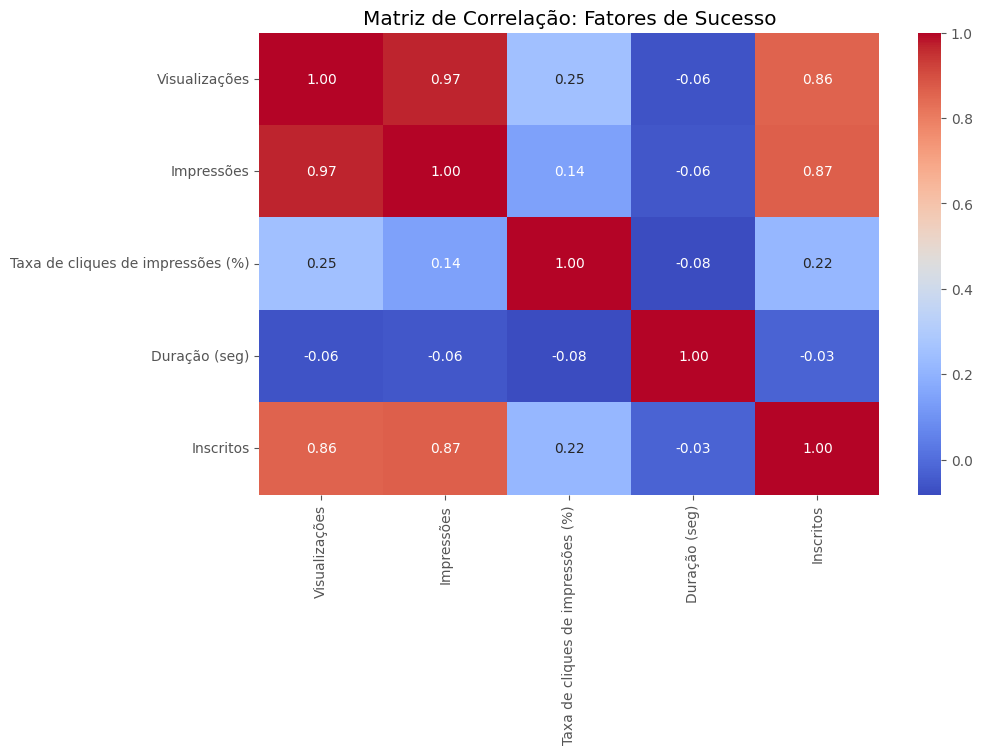

In [8]:
plt.figure(figsize=(10, 6))
correlation_cols = ['Visualizações', 'Impressões', 'Taxa de cliques de impressões (%)', 'Duração (seg)', 'Inscritos']
sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação: Fatores de Sucesso')
plt.show()

### 5.3 Eficiência de Conversão (Impressões vs Visualizações)
Cruzamos o alcance (Impressões) com o resultado final (Views). O tamanho das bolhas representa a **Taxa de Clique (CTR)**.
* **Objetivo:** Identificar *Outliers* (vídeos que fugiram do padrão).

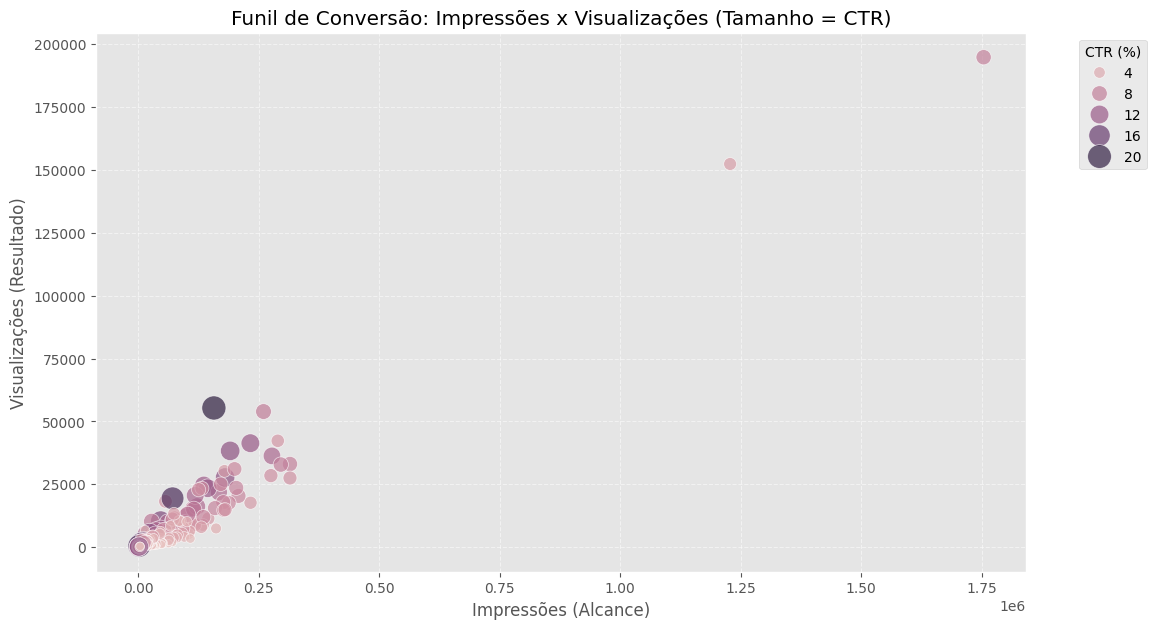

In [9]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Impressões', y='Visualizações',
                hue='Taxa de cliques de impressões (%)', size='Taxa de cliques de impressões (%)',
                sizes=(20, 300), alpha=0.7)
plt.title('Funil de Conversão: Impressões x Visualizações (Tamanho = CTR)')
plt.xlabel('Impressões (Alcance)')
plt.ylabel('Visualizações (Resultado)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='CTR (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 6. Resultados e Discussão

### Principais Descobertas
1.  **A Hegemonia das Impressões:** A correlação quase perfeita (**~0.97**) entre Impressões e Visualizações indica que o maior gargalo para o crescimento não é o conteúdo em si, mas a entrega do algoritmo. Se o YouTube não mostra, o vídeo não é visto.
2.  **O Papel do CTR:** Embora a correlação linear global do CTR seja baixa, o gráfico de dispersão revela que os vídeos "outliers" (que performaram muito acima da média) possuem bolhas maiores (CTR alto). Isso sugere que o CTR age como um "catalisador": ele não garante views sozinho, mas potencializa o alcance quando o algoritmo começa a entregar.
3.  **Duração é Indiferente:** Não houve correlação significativa entre a duração do vídeo e o número de visualizações, refutando a ideia de que vídeos longos necessariamente performam pior neste nicho.

### Limitações
* **Amostra Única:** Os dados refletem o comportamento de apenas um canal e um nicho específico (Tecnologia/Jogos), não podendo ser generalizados para todo o YouTube.
* **Variáveis Ocultas:** Fatores externos como sazonalidade (férias escolares), tendências momentâneas (Hypes) e qualidade visual da miniatura não estão presentes numericamente na tabela, mas influenciam o resultado.

### Conclusão
O trabalho demonstrou que a análise de dados é fundamental para desmistificar a criação de conteúdo. Identificamos que o foco estratégico do canal deve ser em **aumentar a Taxa de Clique (CTR)** para forçar o algoritmo a gerar mais **Impressões**, pois uma vez que as impressões ocorrem, as visualizações são uma consequência matemática direta.